In [96]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import itertools

from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_moons

X, y = make_moons(1000,
                    noise=0.10,
                    random_state=42)

X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

In [33]:
X


array([[-0.00933187,  0.39098105],
       [ 0.95457387, -0.47375583],
       [ 0.9185256 , -0.42519648],
       ...,
       [ 1.65391483, -0.29179795],
       [-0.9341017 ,  0.35358221],
       [ 0.7968358 ,  0.60423662]])

In [34]:
def plot_decision_boundary(model, X, y):

  # Define the axis boundaries
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X values
  x_in = np.c_[xx.ravel(), yy.ravel()]

  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

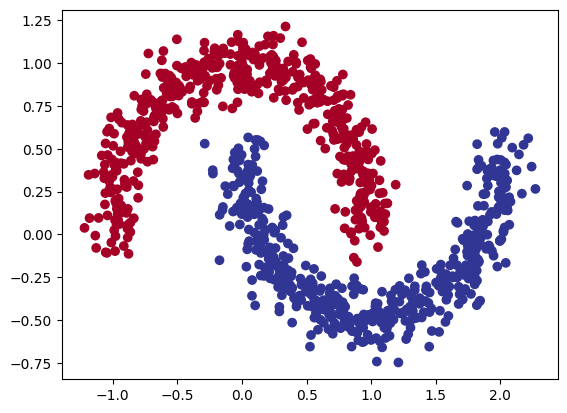

In [85]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

In [86]:
# Set random seed
tf.random.set_seed(42)

# Create
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(5, activation="relu"),
  tf.keras.layers.Dense(5, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile
model_1.compile(loss=tf.keras.losses.binary_crossentropy,
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                 metrics=["accuracy"])

# Fit
history_1 = model_1.fit(X_train, y_train, epochs=25)

Epoch 1/25
25/25 [==============================] - 1s 2ms/step - loss: 0.6281 - accuracy: 0.7100
Epoch 2/25
25/25 [==============================] - 0s 2ms/step - loss: 0.3580 - accuracy: 0.8675
Epoch 3/25
25/25 [==============================] - 0s 2ms/step - loss: 0.2519 - accuracy: 0.8850
Epoch 4/25
25/25 [==============================] - 0s 2ms/step - loss: 0.2285 - accuracy: 0.8875
Epoch 5/25
25/25 [==============================] - 0s 2ms/step - loss: 0.2068 - accuracy: 0.9100
Epoch 6/25
25/25 [==============================] - 0s 2ms/step - loss: 0.1809 - accuracy: 0.9162
Epoch 7/25
25/25 [==============================] - 0s 2ms/step - loss: 0.1539 - accuracy: 0.9362
Epoch 8/25
25/25 [==============================] - 0s 2ms/step - loss: 0.1229 - accuracy: 0.9413
Epoch 9/25
25/25 [==============================] - 0s 2ms/step - loss: 0.0976 - accuracy: 0.9675
Epoch 10/25
25/25 [==============================] - 0s 2ms/step - loss: 0.0736 - accuracy: 0.9787
Epoch 11/25
25/25 [

Text(0.5, 1.0, 'Model_1 training curves')

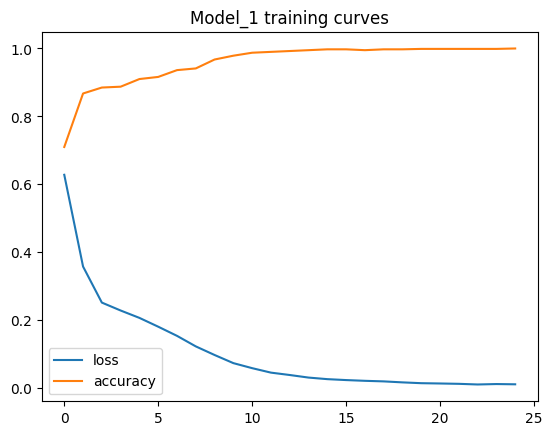

In [87]:
pd.DataFrame(history_1.history).plot()
plt.title("Model_1 training curves")

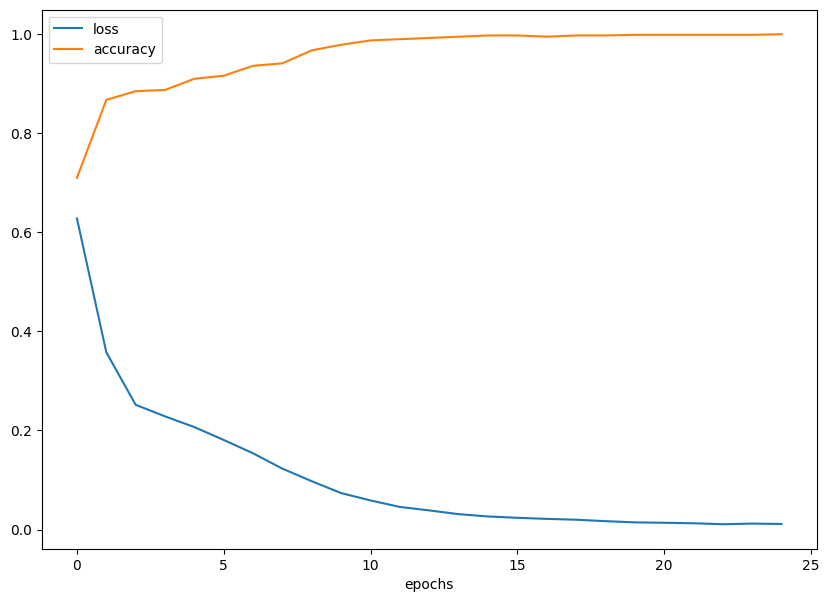

In [88]:
pd.DataFrame(history_1.history).plot(figsize=(10,7), xlabel="epochs");

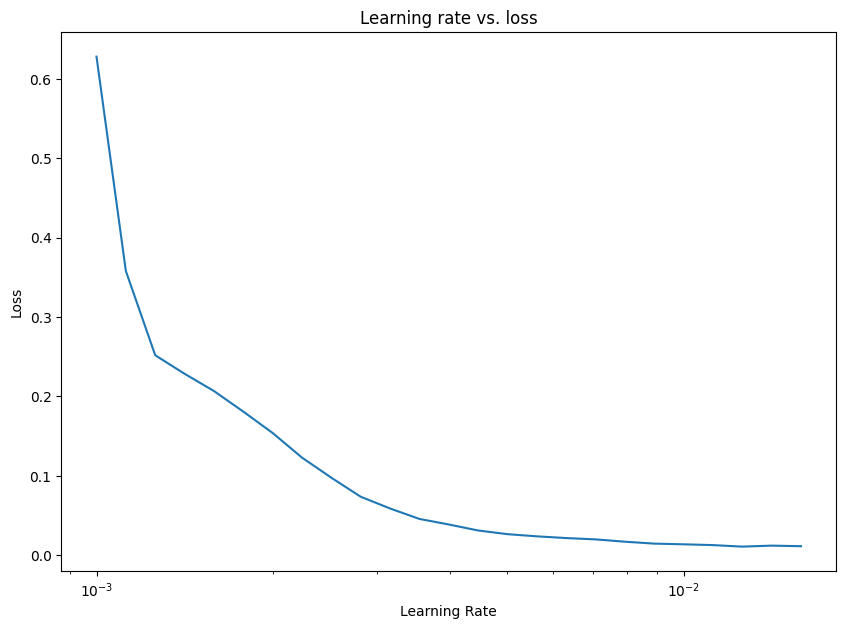

In [89]:
# Plot the learning rate versus the loss
lrs = 1e-3 * (10 ** (np.arange(25)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history_1.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. loss");

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...
313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


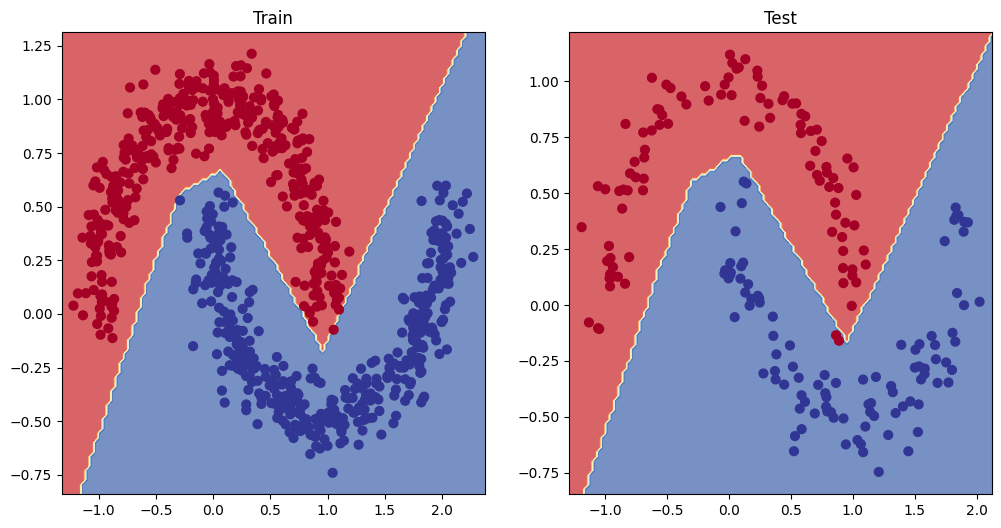

In [90]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X=X_test, y=y_test)
plt.show()

In [91]:
loss, accuracy = model_1.evaluate(X_test, y_test)
print(f"Model loss on test set: {loss}")
print(f"Model accuracy on test set: {(accuracy*100):.2f}%")

7/7 [==============================] - 1s 3ms/step - loss: 0.0186 - accuracy: 0.9900
Model loss on test set: 0.018579788506031036
Model accuracy on test set: 99.00%


In [94]:
y_preds = model_1.predict(X_test)
confusion_matrix(y_test, tf.round(y_preds))

7/7 [==============================] - 0s 4ms/step


array([[99,  2],
       [ 0, 99]])

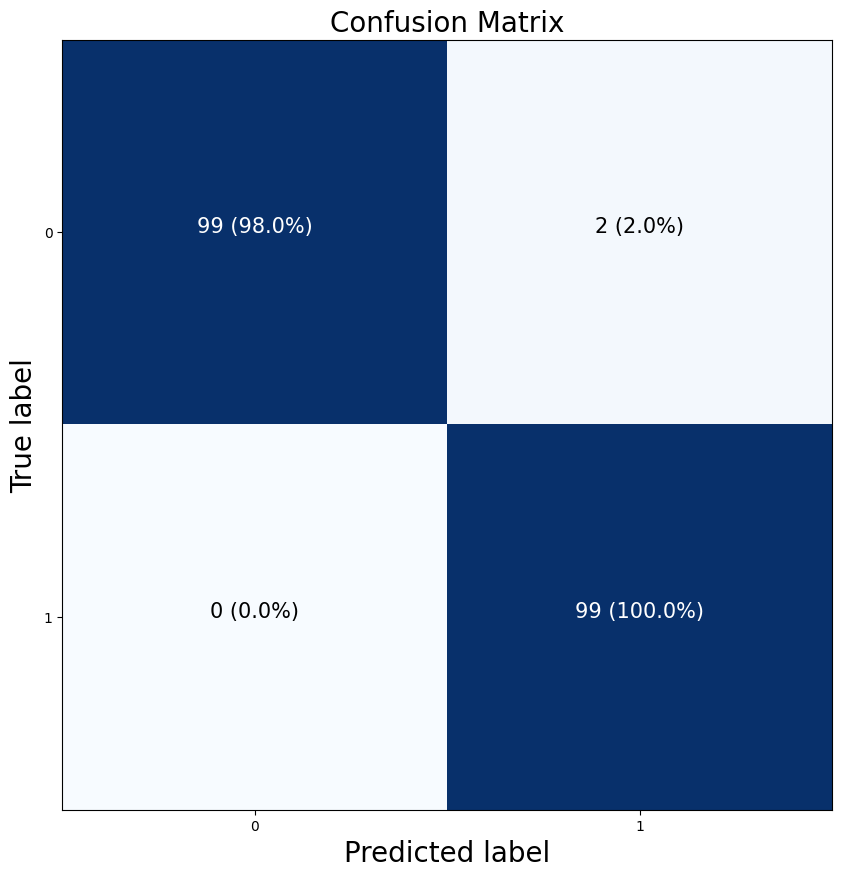

In [97]:
figsize = (10, 10)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues)

# Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted label",
       ylabel="True label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)